## Table of Contents

1. [Chapter 1 - Udacity Final Project](#hy2)
2. [Chapter 2 - Step 1: Define the Problem](#hy3)
3. [Chapter 3 - Step 2: Gather the Data](#hy4)
4. [Chapter 4 - Step 3: Prepare the Data](#hy5)
5. [Chapter 5 - Step 4:Analysis](#hy51)
5. [Chapter 6 - Step 5: The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting](#hy6)
6. [Chapter 7 - Step 6: Perform Exploratory Analysis with Statistics](#hy7)
7. [Chapter 8 - Step 7: Modelling](#hy8)
8. [Chapter 9 - Conclusion](#hy9)
8. [Chapter 10 - References](#hy10)

 <a id='hy2'></a>

### Chapter 1 - Udacity Final Project
This directory contain all code that was used for the [Udacity Data Scientist Nanodegree Program](https://www.udacity.com/course/data-scientist-nanodegree--nd025)

 <a id='hy3'></a>

### Chapter 2 - Step 1: Define the Problem 
For this project, the problem statement is given to us , develop an algorithm to predict the default of home credit .

Project Summary: Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

In this project, we ask you to complete the analysis of which customers of home credit were likely default. In particular, we ask you to apply the tools of machine learning to predict which customers defaulted.

Project Metrics: Default customer can be predicted using less variable at credit risk perspective. So selected model specification must be explainable and applicable. 


Practice Skills

+ Binary classification
+ Python

<a id='hy4'></a>

### Chapter 3 - Step 2: Gather the Data
 The dataset is given to us as test and train data at [Kaggle's Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk)

#### 3.1 Import Libraries
The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [1]:
#load packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random as rnd

#### 3.11 Load Data Modelling Libraries
We will use the popular scikit-learn library to develop our machine learning algorithms and for data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [2]:
#Common Model Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

<a id='hy5'></a>

### Chapter 4 - Step 3: Prepare the Data
To begin this step, The data is imported firstly . Next we use the info() and head() function, to get a quick and dirty overview of variable datatypes (i.e. qualitative vs quantitative). Click here for the [Source Data Dictionary](https://www.kaggle.com/c/home-credit-default-risk/data).

In [3]:
train_df = pd.read_csv("application_train.csv")
test_df = pd.read_csv("application_test.csv")
#bureau_df = pd.read_csv("bureau.csv")
#bureau_balance_df = pd.read_csv("bureau_balance.csv")
#credit_card_balance_df = pd.read_csv("credit_card_balance.csv")
#HomeCredit_columns_description_df=pd.read_csv("HomeCredit_columns_description.csv")
#installments_payments_df=pd.read_csv("installments_payments.csv")
#POS_CASH_balance_df=pd.read_csv("POS_CASH_balance.csv")
#previous_application_df=pd.read_csv("previous_application.csv")
#sample_submission_df=pd.read_csv("sample_submission.csv")

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
# train_df
# preview the data

train_df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0           Family         State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loan

In [6]:
# train_df
#data info

train_df.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [7]:
# train_df
# data describe

train_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817       0.211062  1.910602e-01       0.194844         0.10824          0.082438                     0.059223         0.113280        0.076036       0.134576       0.100049       0.144641       0.161380       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107936           0.084307                      0.064575          0.110111         0.074445        0.132256   
min    100002.000000       0.000000       0.000000      2.

In [8]:
# train_df
# data describe for object

categorical_varaible=train_df.describe(include=['O'])
categorical_varaible

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE
count              307511      307511       307511          307511          306219           307511                         307511             307511             307511          211120                     307511                  307511              97216          153214             151170              161756
unique                  2           3            2               2               7                8                              5                  6                  6              18                          7                      58                  4               3                  7                   2
top            Cash loans           F            N               Y   Unaccompanied          Working  Secondary / secondary special            Married  House / apartment        Laborers                    TUESDAY  Business Entity Type 3   reg oper account  block of flats              Panel                  No
freq               278232      202448       202924          213312          248526           158774                         218391             196432             272868           55186                      53901                   67992              73830          150503              66040              159428

What is the distribution of categorical features?

 * Contract type as two possible values with 90% Cash loans	 (top=Cash loans, freq=278232/count=307511).
 * Gender variable as three possible values with 66% female (top=female, freq=202448/count=307511).
 * Own Car variable as two possible values with 66% "No" (top=N, freq=202924/count=307511).
 * Own Realty variable as two possible values with 69% "Yes" (top=Y, freq=213312/count=307511).
 * Suite Type variable as seven possible values with 81% unaccompanied (top=Unaccompanied, freq=248526/count=306219).
 * Income Type  variable as eight possible values with 81% Working (top=Working, freq=248526/count=307511).
 * Education Type variable as five possible values with 71% unaccompanied (top=Secondary / secondary special, freq=218391/count=307511).
 * Family status variable as six possible values with 64% "Married" (top=Married, freq=196432/count=307511).
 * Housing type variable as six possible values with 89% "House / apartment	" (top=House / apartment, freq=272868/count=307511).
 * Occupation type variable as eighteen possible values with 26% "Laborers" (top=Laborers, freq=55186/count=211120).
 * Weekday aproval process start day variable as seven possible values with 18% "TUESDAY" (top=TUESDAY, freq=53901/count=307511).
 * Organization type variable as fifty eight possible values with 22% "Business Entity Type 3" (top=Business Entity Type 3, freq=67992/count=307511).
 * Fondkapremont mode variable as four possible values with 76% "reg oper account" (top=reg oper account, freq=73830/count=97216).
 * House type variable as three possible values with 98% "block of flats" (top=block of flats, freq=150503/count=153214).
 * Walls material variable as seven possible values with 44% "Panel" (top=No, freq=66040/count=151170).
 * Emergency state variable as two possible values with 99% "No" (top=No, freq=159428/count=161756). 

 <a id='hy51'></a>

 <a id='hy51'></a>

### Chapter 5 - Step 4:Analysis

## 5.1 Data Desciption

In [9]:
# train_df
# preview the data

train_df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0           Family         State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loan

In [10]:
# train_df
# data describe

train_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817       0.211062  1.910602e-01       0.194844         0.10824          0.082438                     0.059223         0.113280        0.076036       0.134576       0.100049       0.144641       0.161380       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107936           0.084307                      0.064575          0.110111         0.074445        0.132256   
min    100002.000000       0.000000       0.000000      2.

 ## 5.2 Data Visulation

In [11]:
def barchart(df,variable):

    sns.set(style="darkgrid")

    base_color = sns.color_palette()[0]

    order = df[variable].value_counts().index

    sns.countplot(data = df, x = variable, hue=variable, color = base_color, order = order , palette="Set3")

In [12]:
def catplot_WTARGET(df,variable,TARGET):

    sns.set(style="darkgrid")

    base_color = sns.color_palette()[0]

    order = df[variable].value_counts().index

    sns.catplot(data = df, x = variable, hue=variable, color = base_color,  kind="count",  palette="Set3", col=TARGET, height=4, aspect=.7)

In [13]:
def piechart(df,variable):

    sorted_counts = df[variable].value_counts()

    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 100,

    counterclock = False, wedgeprops = {'width' : 0.4},  radius=1.5);

    plt.axis('square')

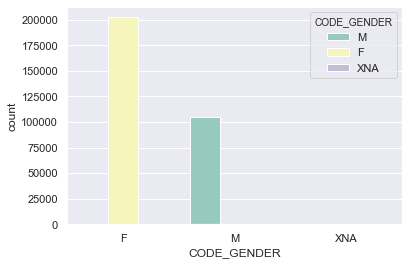

In [14]:
barchart(train_df,'CODE_GENDER')

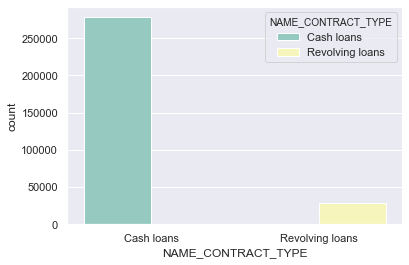

In [15]:
barchart(train_df,'NAME_CONTRACT_TYPE')

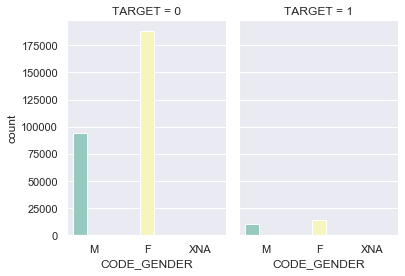

In [16]:
catplot_WTARGET(train_df,'CODE_GENDER','TARGET')

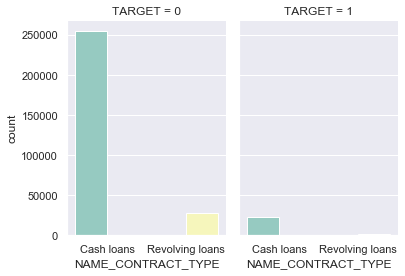

In [17]:
catplot_WTARGET(train_df,'NAME_CONTRACT_TYPE','TARGET')

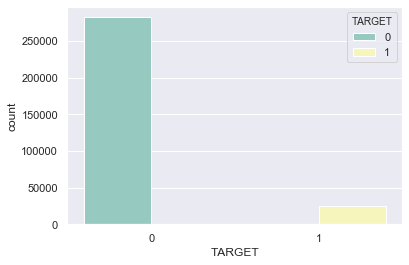

In [18]:
barchart(train_df,'TARGET')

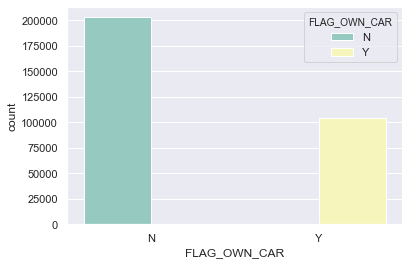

In [19]:
barchart(train_df,'FLAG_OWN_CAR')

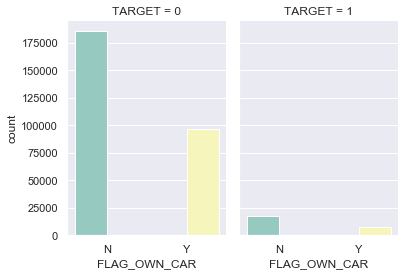

In [20]:
catplot_WTARGET(train_df,'FLAG_OWN_CAR','TARGET')

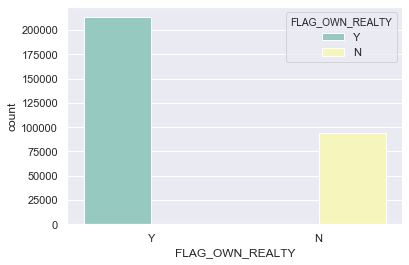

In [21]:
barchart(train_df,'FLAG_OWN_REALTY')

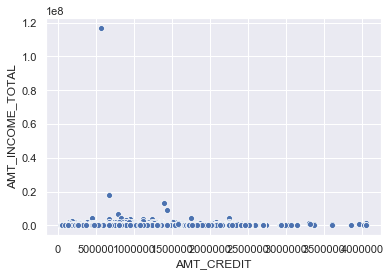

In [22]:
sns.scatterplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL" , data=train_df)

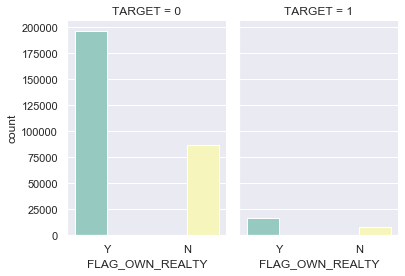

In [23]:
catplot_WTARGET(train_df,'FLAG_OWN_REALTY','TARGET')

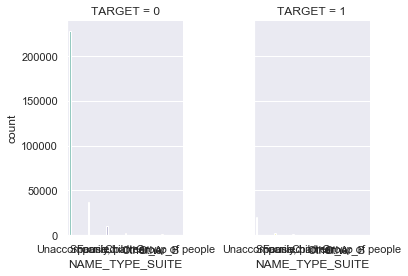

In [24]:
catplot_WTARGET(train_df,'NAME_TYPE_SUITE','TARGET')

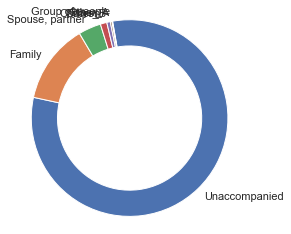

In [25]:
piechart(train_df,'NAME_TYPE_SUITE')

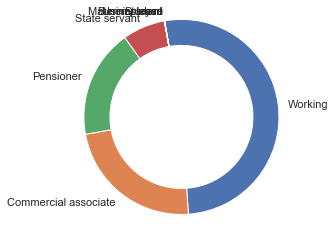

In [26]:
piechart(train_df,'NAME_INCOME_TYPE')

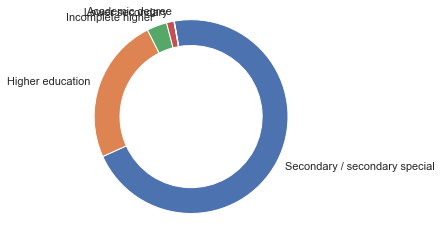

In [27]:
piechart(train_df,'NAME_EDUCATION_TYPE')

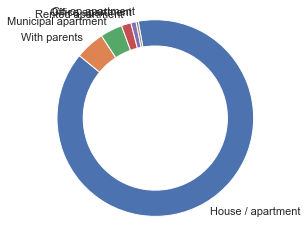

In [28]:
piechart(train_df,'NAME_HOUSING_TYPE')

### Chapter 6 - The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In this stage,  data should have been cleaned
1. Correcting abnormal values and outliers
2. Completing missing information
3. Creating new features for analysis
4. Converting fields to the correct format for calculations and presentation.

Correcting: Reviewing the data, there should have been analyzed to be any abnormal or non-acceptable data inputs. 
In addition, age and income may have outlier values.Exploratory analysis will done to find reasonable values. Outliers should been elimated in dataset.It should be noted, that if unreasonable values were , for example age is 1000  then it also should be elimaneted.  

Completing: There are null values or missing data in dataset. Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values. Thus, it's important to fix before modeling will started because several models will have compared. There are two common methods, either delete the record or populate the missing value using a reasonable input. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. A basic methodology for qualitative data is impute using mode. A basic methodology for quantitative data is impute using mean, median, or mean + randomized standard deviation. 


Creating:  Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome.

Converting: Last, but certainly not least, we'll deal with formatting. There are no date or currency formats, but datatype formats. Our categorical data imported as objects, which makes it difficult for mathematical calculations. For this dataset, we will convert object datatypes to categorical dummy variables

### 5.1 Correcting

We have been analyzed for dataset. We have seen the maximumum count of childred variable. So maximum age is 19. Outlier have elimated for count of children=19.  
We have not seen any anormaly dataset. We check this step for dataset

In [29]:
train_df=train_df[train_df.CNT_CHILDREN !=19 ]

In [30]:
test_df=test_df[test_df.CNT_CHILDREN !=19 ]

In [31]:
train_df=train_df[train_df.DAYS_LAST_PHONE_CHANGE.notnull()]

In [32]:
test_df=test_df[test_df.DAYS_LAST_PHONE_CHANGE.notnull()]

In [33]:
train_df.describe()

SK_ID_CURR        TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  \
count  307508.000000  307508.00000  307508.000000      3.075080e+05  3.075080e+05  307496.000000     3.072300e+05               307508.000000  307508.000000  307508.000000      307508.000000    307508.000000  104581.000000    307508.0   307508.000000    307508.000000     307508.000000  307508.000000  307508.000000    307506.000000         307508.000000                307508.000000            307508.000000               307508.000000               307508.000000                307508.000000           307508.000000           307508.000000            307508.000000  134132.000000  3.068490e+05  246545.000000   151448.000000     127566.000000                157502.000000    103022.000000    92645.000000  143618.000000  152681.000000  154489.000000   98868.000000  124919.000000          97311.000000   153159.000000             93996.000000      137828.000000    151448.000000      127566.000000                 157502.000000     103022.000000     92645.000000   143618.000000   152681.000000   
mean   278180.610368       0.08073       0.416932      1.687984e+05  5.990296e+05   27108.680365     5.383995e+05                    0.020868  -16037.054197   63815.678366       -4986.127935     -2994.217214      12.061005         1.0        0.819888         0.199367          0.998133       0.281063       0.056720         2.152550              2.052464                     2.031521                12.063410                    0.015144                    0.050769                     0.040659                0.078174                0.230456                 0.179556       0.502128  5.143937e-01       0.510853        0.117440          0.088442                     0.977735         0.752472        0.044621       0.078941       0.149725       0.226280       0.231894       0.066333              0.100775        0.107398                 0.008809           0.028357         0.114231           0.087544                      0.977065          0.759637         0.042553        0.074490        0.145193   
std    102790.006413       0.27242       0.720568      2.371242e+05  4.024910e+05   14493.750604     3.694468e+05                    0.013831    4363.967650  141276.310523        3522.901809      1509.448197      11.944837         0.0        0.384282         0.399525          0.043164       0.449519       0.231308         0.909548              0.509036                     0.502739                 3.265843                    0.122127                    0.219527                     0.197500                0.268445                0.421125                 0.383818       0.211062  1.910597e-01       0.194845        0.108241          0.082439                     0.059224         0.113280        0.076036       0.134577       0.100050       0.144641       0.161381       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107937           0.084308                      0.064576          0.110112         0.074445        0.132257        0.100978   
min    100

### 5.2 Completing
We can analyze the missing value. But some data can not completed for missing value. Because some values normally is missingç For example customers who have no credit bureau information and related coloumns have no information about customer. We can filter variable of occupation_type because of 96391 missing value. 

In [34]:
train_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202927
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [35]:
test_df.isnull().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [36]:
train_df.drop(['OCCUPATION_TYPE'],axis=1,inplace=True)

In [37]:
test_df.drop(['OCCUPATION_TYPE'],axis=1,inplace=True)

### 5.3 Creating

Days_employed variable divided by Days_birts variable is calculated days_employed_perc in train and test dataset

In [38]:
train_df['DAYS_EMPLOYED_PERC'] = train_df['DAYS_EMPLOYED'] / train_df['DAYS_BIRTH']
train_df['DAYS_EMPLOYED_PERC']

0          0.067329
1          0.070862
2          0.011814
3          0.159905
4          0.152418
            ...    
307506     0.025303
307507   -17.580890
307508     0.529266
307509     0.400134
307510     0.074869
Name: DAYS_EMPLOYED_PERC, Length: 307508, dtype: float64

In [39]:
train_df['AGE_CAL']=-train_df['DAYS_BIRTH']/365
train_df['AGE_CAL']

test_df['AGE_CAL']=-test_df['DAYS_BIRTH']/365
test_df['AGE_CAL']

0        52.715068
1        49.490411
2        54.898630
3        38.290411
4        35.726027
           ...    
48739    54.712329
48740    30.646575
48741    43.621918
48742    38.268493
48743    38.252055
Name: AGE_CAL, Length: 48744, dtype: float64

In [40]:
train_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0           100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202   
1           100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family         State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130                0.0773   
2           100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN                   NaN   
3   

In [41]:
test_df['DAYS_EMPLOYED_PERC'] = test_df['DAYS_EMPLOYED'] / test_df['DAYS_BIRTH']
test_df['AGE_CAL']=-test_df['DAYS_BIRTH']/365

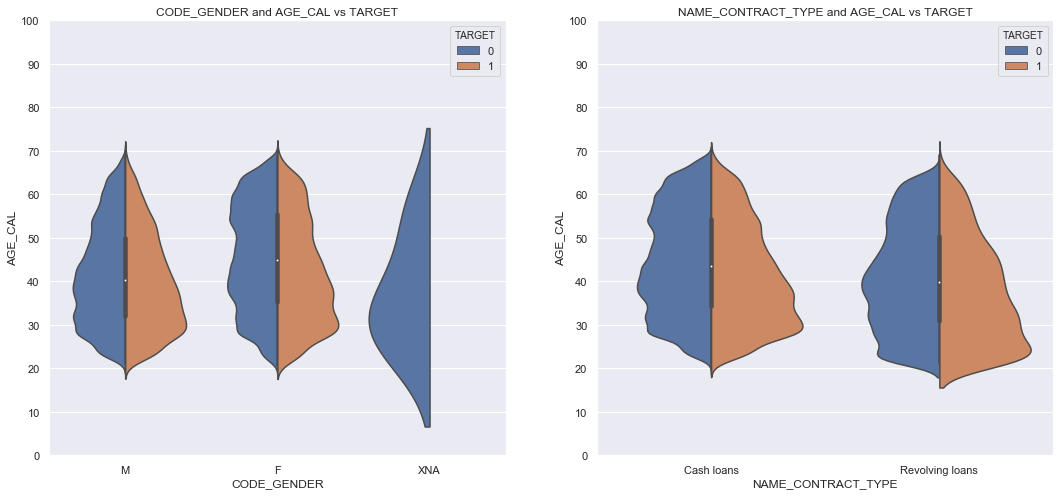

In [42]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("CODE_GENDER", "AGE_CAL", hue="TARGET", data=train_df,split=True,ax=ax[0])
ax[0].set_title('CODE_GENDER and AGE_CAL vs TARGET')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("NAME_CONTRACT_TYPE","AGE_CAL", hue="TARGET", data=train_df,split=True,ax=ax[1])
ax[1].set_title('NAME_CONTRACT_TYPE and AGE_CAL vs TARGET')
ax[1].set_yticks(range(0,110,10))
plt.show()

Age grouping have been appeared need in this graphs. We think age group have been in below side
* 18-30
* 30-45
* +45

In [43]:
#https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition

def f(row):
    if row['AGE_CAL'] < 30:
        AGE_BIN = 1
    elif row['AGE_CAL'] < 45:
        AGE_BIN = 2
    else:
        AGE_BIN = 3
    return AGE_BIN
train_df['AGE_BIN'] = train_df.apply(f, axis=1)

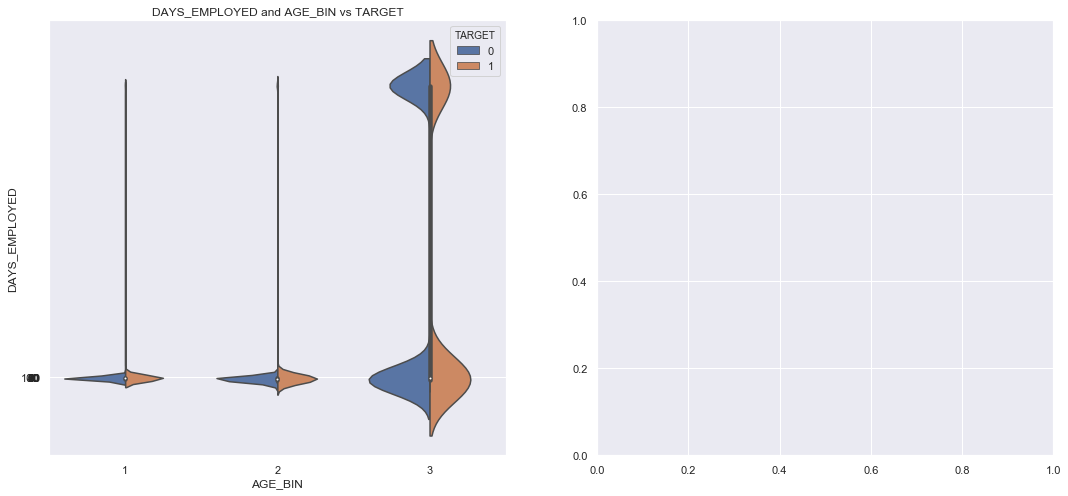

In [44]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("AGE_BIN", "DAYS_EMPLOYED", hue="TARGET", data=train_df,split=True,ax=ax[0])
ax[0].set_title('DAYS_EMPLOYED and AGE_BIN vs TARGET')
ax[0].set_yticks(range(0,110,10))

In [45]:
def density_plot (df,varaible):
    plt.figure(figsize = (10, 8))

    # KDE plot of loans that were repaid on time
    sns.kdeplot(df.loc[df['TARGET'] == 0, varaible], label = 'target == 0')

    # KDE plot of loans which were not repaid on time
    sns.kdeplot(df.loc[df['TARGET'] == 1, varaible], label = 'target == 1')

    # Labeling of plot
    plt.xlabel(varaible); plt.ylabel('Density'); plt.title(varaible);

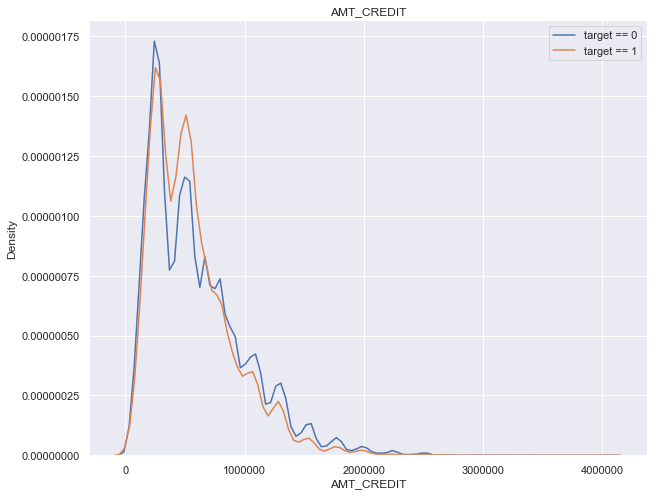

In [46]:
density_plot(train_df,'AMT_CREDIT')

In [47]:
#https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition

def f(row):
    if row['AMT_CREDIT'] < 5000000:
        AMT_CREDIT_BIN = 1
    elif row['AMT_CREDIT'] < 10000000:
        AMT_CREDIT_BIN = 2
    else:
        AMT_CREDIT_BIN = 3
    return AMT_CREDIT_BIN
train_df['AMT_CREDIT_BIN'] = train_df.apply(f, axis=1)

In [48]:
#https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition

def f(row):
    if row['AMT_GOODS_PRICE'] < 5000000:
        AMT_GOODS_PRICE_BIN = 1
    elif row['AMT_GOODS_PRICE'] < 10000000:
        AMT_GOODS_PRICE_BIN = 2
    else:
        AMT_GOODS_PRICE_BIN = 3
    return AMT_GOODS_PRICE_BIN
train_df['AMT_GOODS_PRICE_BIN'] = train_df.apply(f, axis=1)

In [49]:
#https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition

def f(row):
    if row['OWN_CAR_AGE'] == 'NaN':
        OWN_CAR_AGE_BIN = -9
    elif row['OWN_CAR_AGE'] < 10:
        OWN_CAR_AGE_BIN = 1
    elif row['OWN_CAR_AGE'] < 20:
        OWN_CAR_AGE_BIN = 2
    else:
        OWN_CAR_AGE_BIN = 3
    return OWN_CAR_AGE_BIN
train_df['OWN_CAR_AGE_BIN'] = train_df.apply(f, axis=1)

In [50]:
#https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition

def f(row):
    if row['APARTMENTS_AVG'] == 'NaN':
        APARTMENTS_AVG_BIN = -9
    elif row['APARTMENTS_AVG'] < 0.15:
        APARTMENTS_AVG_BIN = 1
    elif row['APARTMENTS_AVG'] < 0.30:
        APARTMENTS_AVG_BIN = 2
    else:
        APARTMENTS_AVG_BIN = 3
    return APARTMENTS_AVG_BIN
train_df['APARTMENTS_AVG_BIN'] = train_df.apply(f, axis=1)

In [51]:
#https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition

def f(row):
    if row['DAYS_LAST_PHONE_CHANGE'] == 'NaN':
        DAYS_LAST_PHONE_CHANGE_BIN = -9
    elif row['DAYS_LAST_PHONE_CHANGE'] < -3000:
        DAYS_LAST_PHONE_CHANGE_BIN = 1
    elif row['DAYS_LAST_PHONE_CHANGE'] < -1000:
        DAYS_LAST_PHONE_CHANGE_BIN = 2
    elif row['DAYS_LAST_PHONE_CHANGE'] == 0:
        DAYS_LAST_PHONE_CHANGE_BIN = 0
    else:
        DAYS_LAST_PHONE_CHANGE_BIN = 3
    return DAYS_LAST_PHONE_CHANGE_BIN
train_df['DAYS_LAST_PHONE_CHANGE_BIN'] = train_df.apply(f, axis=1)

In [52]:
#https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition

def f(row):
    if row['DAYS_EMPLOYED'] == 'NaN':
        DAYS_EMPLOYED_BIN = -9
    elif row['DAYS_EMPLOYED'] < 0:
        DAYS_EMPLOYED_BIN = 1
    elif row['DAYS_EMPLOYED'] < 2000:
        DAYS_EMPLOYED_BIN = 2
    else:
        DAYS_EMPLOYED_BIN = 3
    return DAYS_EMPLOYED_BIN
train_df['DAYS_EMPLOYED_BIN'] = train_df.apply(f, axis=1)

In [53]:
categorical_varaible=train_df.describe(include=['O'])
categorical_varaible_col = set(categorical_varaible.columns)

In [54]:
train_df=pd.get_dummies(train_df, columns=categorical_varaible_col)
train_df.head(5)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  \
0      100002       1             0          202500.0    406597.5      24700.5         351000.0                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0              1.0                     2                            2                       10                           0                           0                            0                       0                       0                        0      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250   
1      100003       0             0          270000.0   1293502.5      35698.5        1129500.0                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0              2.0                     1                            1                       11                           0                           0                            0                       0                       0                        0      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130                0.0773          0.0549                   0.0039             0.0098           0.0924             0.0538                        0.9851            0.8040           0.0497          0.0806          0.0345          0.2917          0.3333   
2      100004       0             0           67500.0    135000.0       6750.0         135000.0                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0              1.0                     2                            2                        9                           0                           0                            0                       0                       0                        0           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN                   NaN             NaN                      NaN                NaN              NaN                NaN                           NaN               NaN              NaN             NaN             NaN             NaN             NaN   
3  

In [55]:
test_df=pd.get_dummies(test_df, columns=categorical_varaible_col)
test_df.head(5)

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  \
0      100001             0          135000.0    568800.0      20560.5         450000.0                    0.018850      -19241          -2329            -5170.0             -812          NaN           1               1                0                 1           0           1              2.0                     2                            2                       18                           0                           0                            0                       0                       0                        0      0.752614      0.789654      0.159520          0.0660            0.0590                       0.9732              NaN             NaN            NaN         0.1379          0.125            NaN           NaN                   NaN          0.0505                      NaN                NaN           0.0672             0.0612                        0.9732               NaN              NaN             NaN          0.1379           0.125             NaN   
1      100005             0           99000.0    222768.0      17370.0         180000.0                    0.035792      -18064          -4469            -9118.0            -1623          NaN           1               1                0                 1           0           0              2.0                     2                            2                        9                           0                           0                            0                       0                       0                        0      0.564990      0.291656      0.432962             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN                   NaN             NaN                      NaN                NaN              NaN                NaN                           NaN               NaN              NaN             NaN             NaN             NaN             NaN   
2      100013             0          202500.0    663264.0      69777.0         630000.0                    0.019101      -20038          -4458            -2175.0            -3503          5.0           1               1                0                 1           0           0              2.0                     2                            2                       14                           0                           0                            0                       0                       0                        0           NaN      0.699787      0.610991             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN                   NaN             NaN                      NaN                NaN              NaN                NaN                           NaN               NaN              NaN             NaN             NaN             NaN             NaN   
3      100028             2        

In [56]:
train_df['TARGET'].value_counts()

0    282683
1     24825
Name: TARGET, dtype: int64

In [57]:
# train_df
#data info

train_df.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 237 columns):
SK_ID_CURR                                           307508 non-null int64
TARGET                                               307508 non-null int64
CNT_CHILDREN                                         307508 non-null int64
AMT_INCOME_TOTAL                                     307508 non-null float64
AMT_CREDIT                                           307508 non-null float64
AMT_ANNUITY                                          307496 non-null float64
AMT_GOODS_PRICE                                      307230 non-null float64
REGION_POPULATION_RELATIVE                           307508 non-null float64
DAYS_BIRTH                                           307508 non-null int64
DAYS_EMPLOYED                                        307508 non-null int64
DAYS_REGISTRATION                                    307508 non-null float64
DAYS_ID_PUBLISH                                    

 <a id='hy7'></a>

## Chapter 6 - Step 4: Perform Exploratory Analysis with Statistics

### 6.1 Correlation Elimination

All variable analyze the correlation of target. We will choose higher than 0.05 or lower than -0.005.
Correlations are very useful in many applications, especially when conducting regression analysis. However, it should not be mixed with causality and misinterpreted in any way. I should also always check the correlation between different variables in our dataset and gather some insights as part of my exploration and analysis.

In [58]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)


In [59]:
v1={'TARGET',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'REGION_POPULATION_RELATIVE',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH',
'OWN_CAR_AGE',
'FLAG_MOBIL',
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_PHONE',
'FLAG_EMAIL',
'CNT_FAM_MEMBERS',
'REGION_RATING_CLIENT'
}

v2={'TARGET',
'REGION_RATING_CLIENT_W_CITY',
'HOUR_APPR_PROCESS_START',
'REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY',
'EXT_SOURCE_1',
'EXT_SOURCE_2',
'EXT_SOURCE_3',
'APARTMENTS_AVG',
'BASEMENTAREA_AVG',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG',
'COMMONAREA_AVG',
'ELEVATORS_AVG',
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'FLOORSMIN_AVG'}

v3={'TARGET',
'LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAREA_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI'
}

v4={'TARGET',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'TOTALAREA_MODE',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'DAYS_LAST_PHONE_CHANGE',
'FLAG_DOCUMENT_2'}
v5={'TARGET',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21',
'AMT_REQ_CREDIT_BUREAU_HOUR'}
v6={
'TARGET',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'DAYS_EMPLOYED_PERC',
'AGE_CAL',
'FONDKAPREMONT_MODE_not specified',
'FONDKAPREMONT_MODE_org spec account',
'FONDKAPREMONT_MODE_reg oper account',
'FONDKAPREMONT_MODE_reg oper spec account',
'WEEKDAY_APPR_PROCESS_START_FRIDAY',
'WEEKDAY_APPR_PROCESS_START_MONDAY',
'WEEKDAY_APPR_PROCESS_START_SATURDAY',
'WEEKDAY_APPR_PROCESS_START_SUNDAY',
'WEEKDAY_APPR_PROCESS_START_THURSDAY',
'WEEKDAY_APPR_PROCESS_START_TUESDAY',
'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
'CODE_GENDER_F',
'CODE_GENDER_M'}
v7={
    'TARGET',
'CODE_GENDER_XNA',
'ORGANIZATION_TYPE_Advertising',
'ORGANIZATION_TYPE_Agriculture',
'ORGANIZATION_TYPE_Bank',
'ORGANIZATION_TYPE_Business Entity Type 1',
'ORGANIZATION_TYPE_Business Entity Type 2',
'ORGANIZATION_TYPE_Business Entity Type 3',
'ORGANIZATION_TYPE_Cleaning',
'ORGANIZATION_TYPE_Construction',
'ORGANIZATION_TYPE_Culture',
'ORGANIZATION_TYPE_Electricity',
'ORGANIZATION_TYPE_Emergency',
'ORGANIZATION_TYPE_Government',
'ORGANIZATION_TYPE_Hotel',
'ORGANIZATION_TYPE_Housing',
'ORGANIZATION_TYPE_Industry: type 1',
'ORGANIZATION_TYPE_Industry: type 10',
'ORGANIZATION_TYPE_Industry: type 11',
'ORGANIZATION_TYPE_Industry: type 12',
'ORGANIZATION_TYPE_Industry: type 13'}

v8={
    'TARGET',
'ORGANIZATION_TYPE_Industry: type 2',
'ORGANIZATION_TYPE_Industry: type 3',
'ORGANIZATION_TYPE_Industry: type 4',
'ORGANIZATION_TYPE_Industry: type 5',
'ORGANIZATION_TYPE_Industry: type 6',
'ORGANIZATION_TYPE_Industry: type 7',
'ORGANIZATION_TYPE_Industry: type 8',
'ORGANIZATION_TYPE_Industry: type 9',
'ORGANIZATION_TYPE_Insurance',
'ORGANIZATION_TYPE_Kindergarten',
'ORGANIZATION_TYPE_Legal Services',
'ORGANIZATION_TYPE_Medicine',
'ORGANIZATION_TYPE_Military',
'ORGANIZATION_TYPE_Mobile',
'ORGANIZATION_TYPE_Other',
'ORGANIZATION_TYPE_Police',
'ORGANIZATION_TYPE_Postal',
'ORGANIZATION_TYPE_Realtor',
'ORGANIZATION_TYPE_Religion',
'ORGANIZATION_TYPE_Restaurant'}

v9={
    'TARGET',
'ORGANIZATION_TYPE_School',
'ORGANIZATION_TYPE_Security',
'ORGANIZATION_TYPE_Security Ministries',
'ORGANIZATION_TYPE_Self-employed',
'ORGANIZATION_TYPE_Services',
'ORGANIZATION_TYPE_Telecom',
'ORGANIZATION_TYPE_Trade: type 1',
'ORGANIZATION_TYPE_Trade: type 2',
'ORGANIZATION_TYPE_Trade: type 3',
'ORGANIZATION_TYPE_Trade: type 4',
'ORGANIZATION_TYPE_Trade: type 5',
'ORGANIZATION_TYPE_Trade: type 6',
'ORGANIZATION_TYPE_Trade: type 7',
'ORGANIZATION_TYPE_Transport: type 1',
'ORGANIZATION_TYPE_Transport: type 2',
'ORGANIZATION_TYPE_Transport: type 3',
'ORGANIZATION_TYPE_Transport: type 4',
'ORGANIZATION_TYPE_University',
'ORGANIZATION_TYPE_XNA',
'NAME_HOUSING_TYPE_Co-op apartment'}

v10={
    'TARGET',
'NAME_HOUSING_TYPE_House / apartment',
'NAME_HOUSING_TYPE_Municipal apartment',
'NAME_HOUSING_TYPE_Office apartment',
'NAME_HOUSING_TYPE_Rented apartment',
'NAME_HOUSING_TYPE_With parents',
'NAME_EDUCATION_TYPE_Academic degree',
'NAME_EDUCATION_TYPE_Higher education',
'NAME_EDUCATION_TYPE_Incomplete higher',
'NAME_EDUCATION_TYPE_Lower secondary',
'NAME_EDUCATION_TYPE_Secondary / secondary special',
'NAME_CONTRACT_TYPE_Cash loans',
'NAME_CONTRACT_TYPE_Revolving loans',
'EMERGENCYSTATE_MODE_No',
'EMERGENCYSTATE_MODE_Yes',
'NAME_TYPE_SUITE_Children',
'NAME_TYPE_SUITE_Family',
'NAME_TYPE_SUITE_Group of people',
'NAME_TYPE_SUITE_Other_A',
'NAME_TYPE_SUITE_Other_B',
'NAME_TYPE_SUITE_Spouse, partner'}

v11={
    'TARGET',
'NAME_TYPE_SUITE_Unaccompanied',
'FLAG_OWN_REALTY_N',
'FLAG_OWN_REALTY_Y',
'WALLSMATERIAL_MODE_Block',
'WALLSMATERIAL_MODE_Mixed',
'WALLSMATERIAL_MODE_Monolithic',
'WALLSMATERIAL_MODE_Others',
'WALLSMATERIAL_MODE_Panel',
'WALLSMATERIAL_MODE_Stone, brick',
'WALLSMATERIAL_MODE_Wooden',
'NAME_FAMILY_STATUS_Civil marriage'}

v12={
    'TARGET',   
    'NAME_FAMILY_STATUS_Married',
'NAME_FAMILY_STATUS_Separated',
'NAME_FAMILY_STATUS_Single / not married',
'NAME_FAMILY_STATUS_Unknown',
'NAME_FAMILY_STATUS_Widow',
'NAME_INCOME_TYPE_Businessman',
'NAME_INCOME_TYPE_Commercial associate',
'NAME_INCOME_TYPE_Maternity leave',
'NAME_INCOME_TYPE_Pensioner',
'NAME_INCOME_TYPE_State servant',
'NAME_INCOME_TYPE_Student',
'NAME_INCOME_TYPE_Unemployed',
'NAME_INCOME_TYPE_Working',
'FLAG_OWN_CAR_N',
'FLAG_OWN_CAR_Y',
'HOUSETYPE_MODE_block of flats',
'HOUSETYPE_MODE_specific housing',
'HOUSETYPE_MODE_terraced house'}

v13={
    'TARGET', 
'AGE_BIN',
'AMT_CREDIT_BIN',
'AMT_GOODS_PRICE_BIN',
'OWN_CAR_AGE_BIN',
'APARTMENTS_AVG_BIN',
'DAYS_LAST_PHONE_CHANGE_BIN',
'DAYS_EMPLOYED_BIN'
}

In [60]:
train_df_v1=train_df[v1]
train_df_v2=train_df[v2]
train_df_v3=train_df[v3]
train_df_v4=train_df[v4]
train_df_v5=train_df[v5]
train_df_v6=train_df[v6]
train_df_v7=train_df[v7]
train_df_v8=train_df[v8]
train_df_v9=train_df[v9]
train_df_v10=train_df[v10]
train_df_v11=train_df[v11]
train_df_v12=train_df[v12]
train_df_v13=train_df[v13]

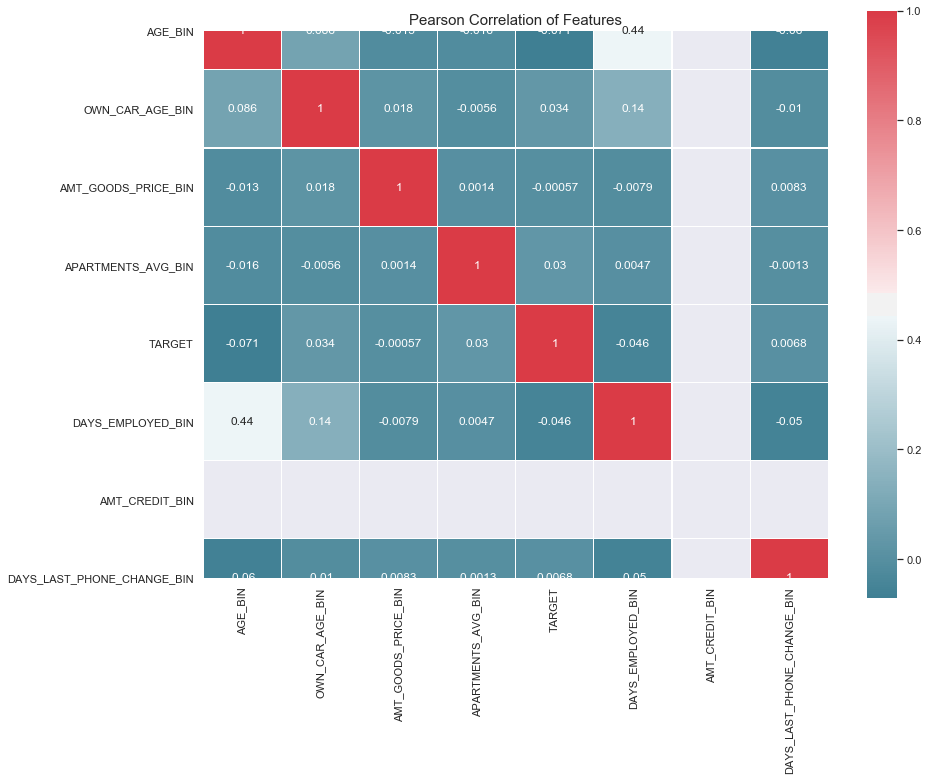

In [61]:
correlation_heatmap(train_df_v13)

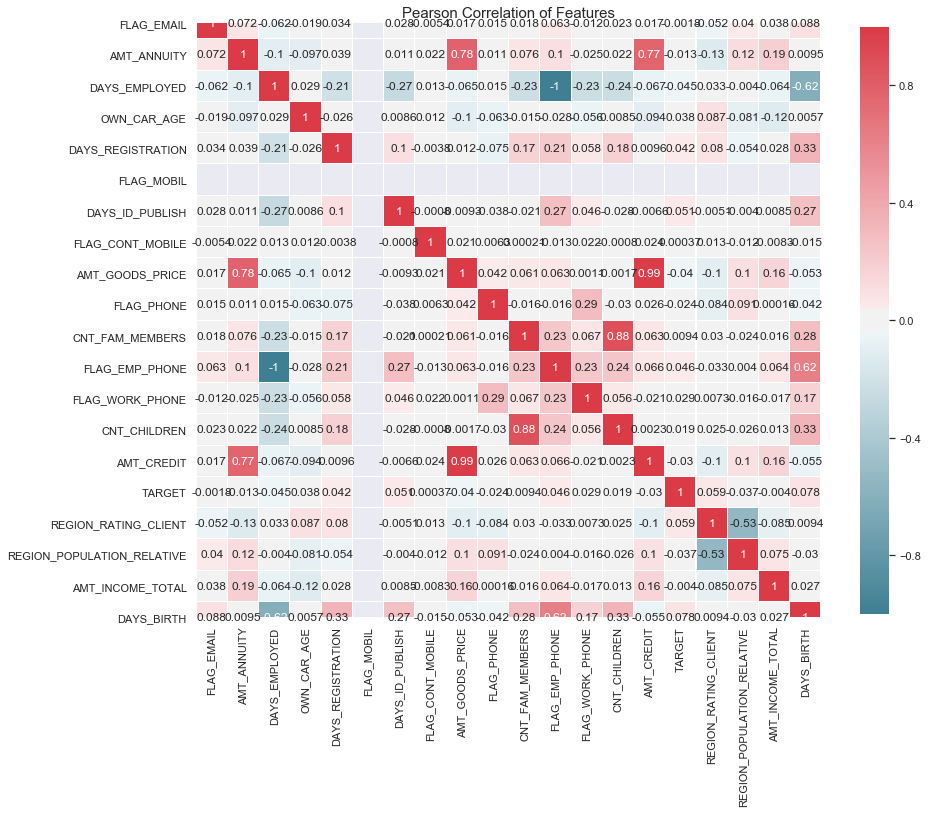

In [62]:
correlation_heatmap(train_df_v1)

REGION_RATING_CLIENT AND DAYS_ID_PUBLISH is higher than 0.05 correlation. So 2 vairables are selected as final vairables 

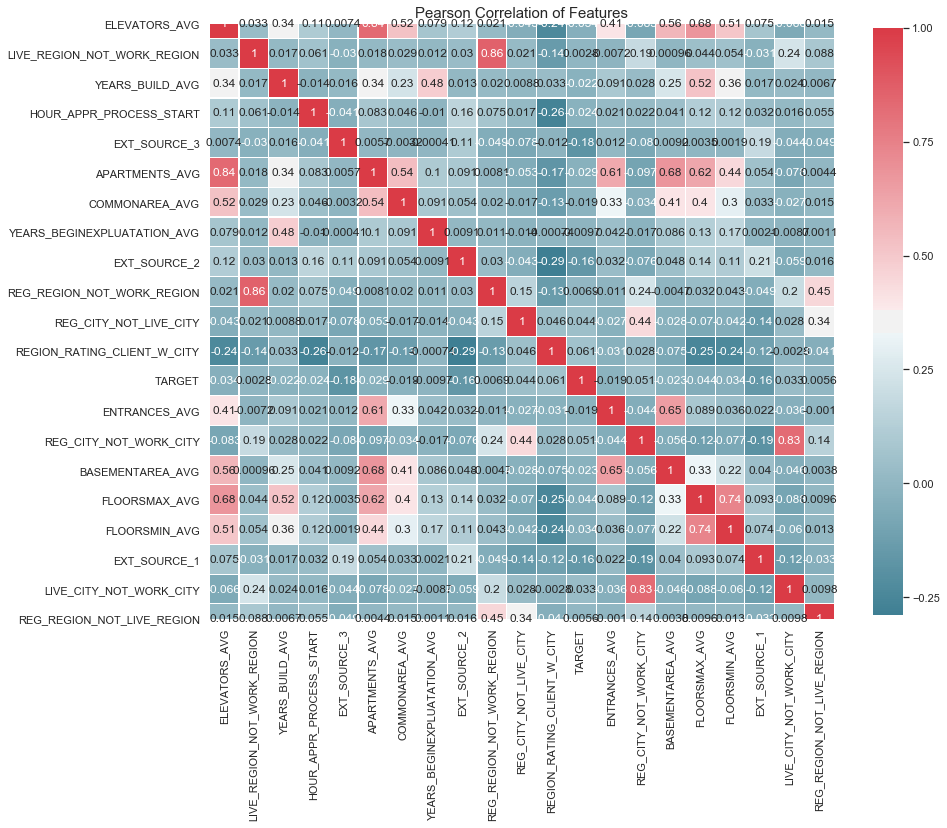

In [63]:
correlation_heatmap(train_df_v2)

REGION_RATING_CLIENT_W_CITY, EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_3 is higher than 0.05 correlation. So 4 vairables are selected as final vairables 

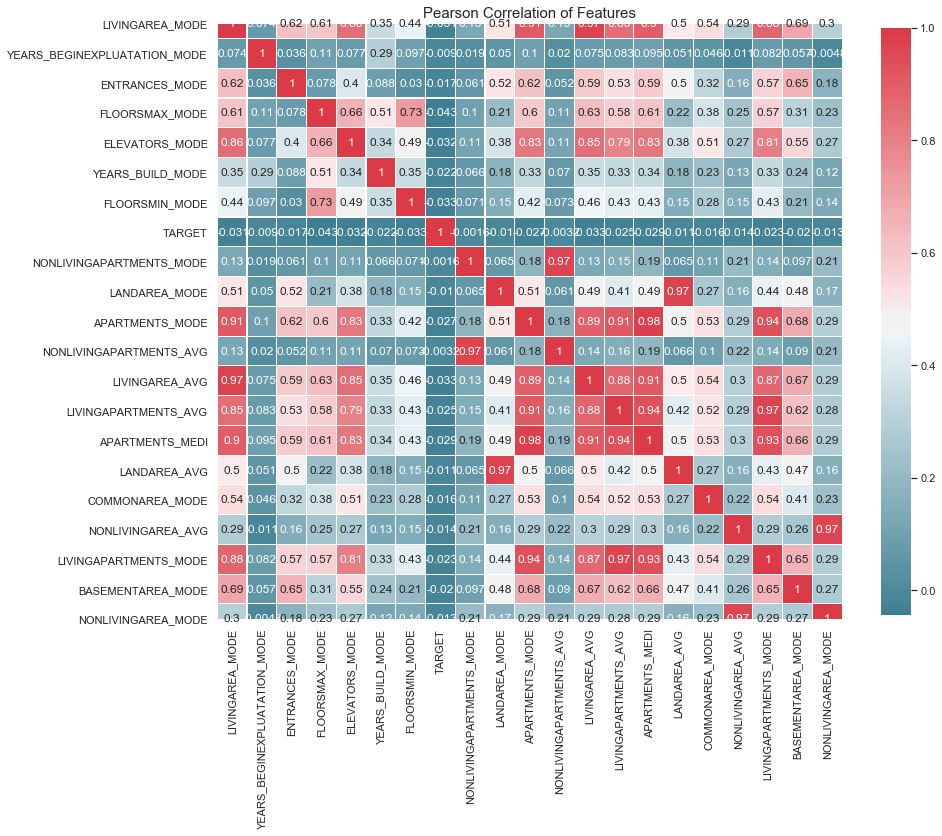

In [64]:
correlation_heatmap(train_df_v3)

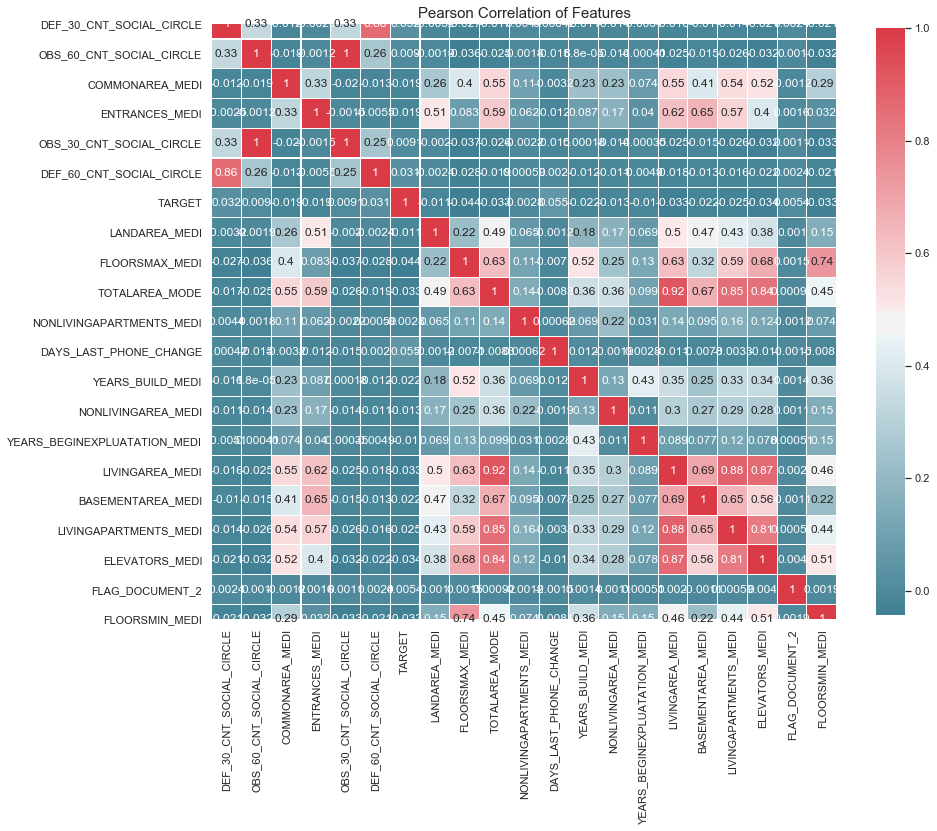

In [65]:
correlation_heatmap(train_df_v4)

DAYS_LAST_PHONE_CHANGE is higher than 0.05 correlation. So 1 vairable İS selected as final vairables

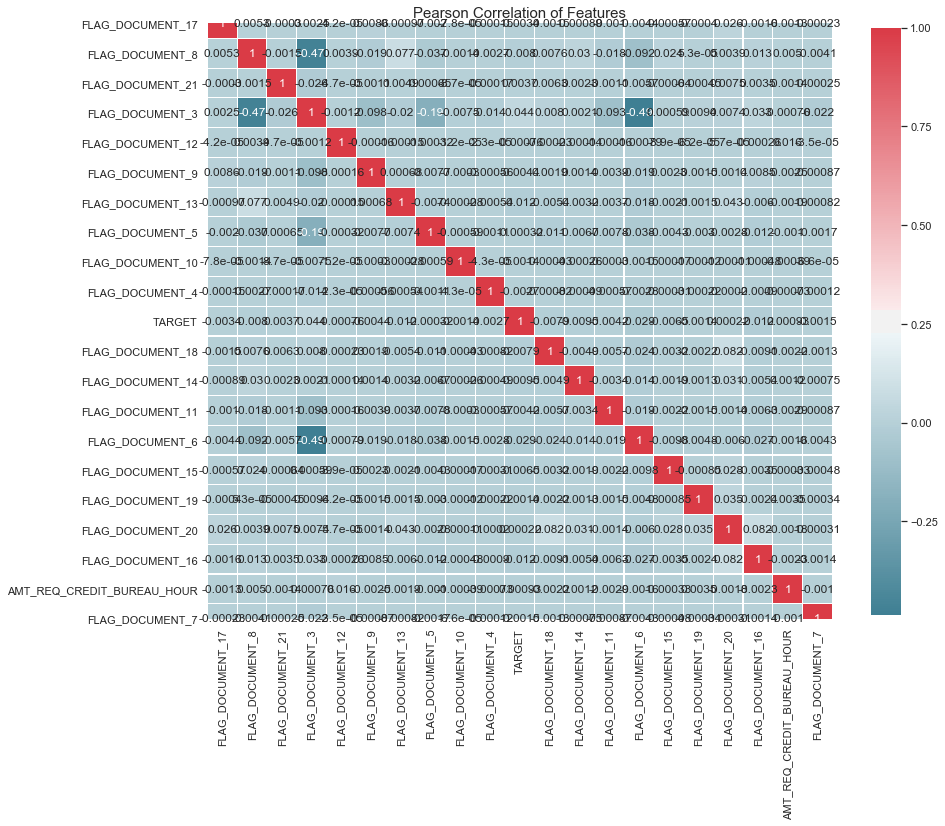

In [66]:
correlation_heatmap(train_df_v5)

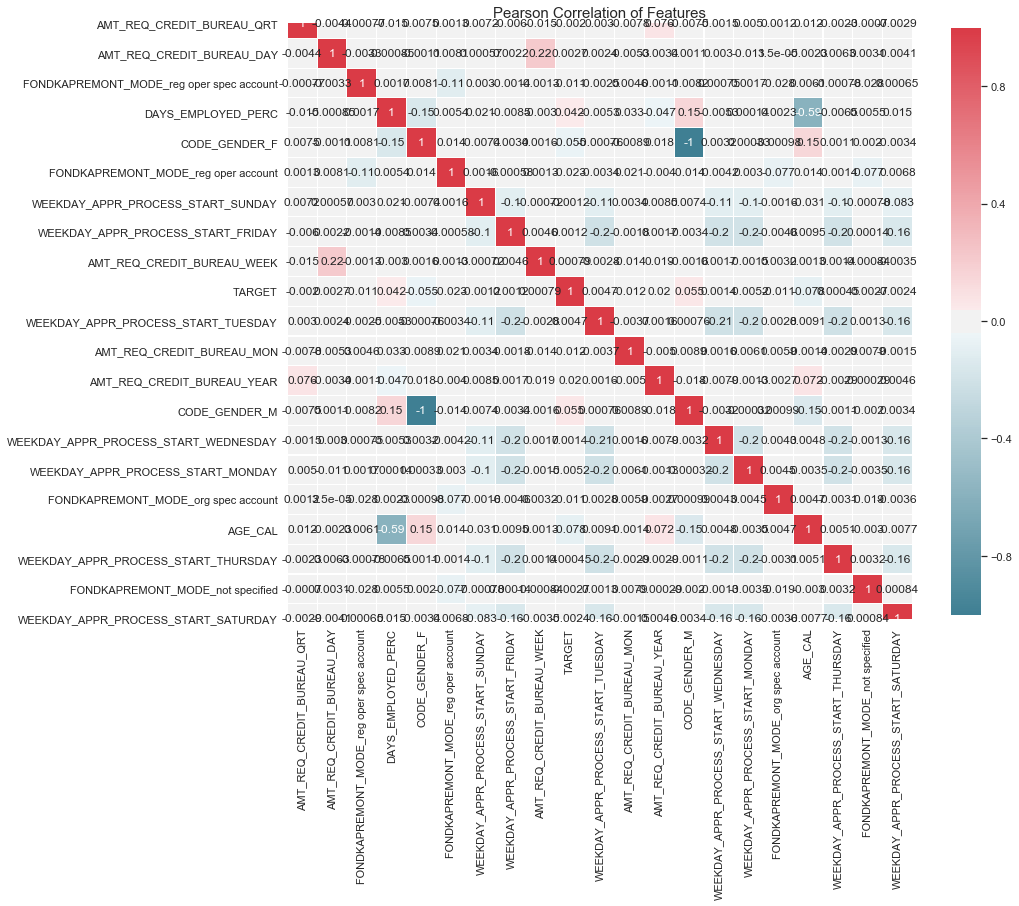

In [67]:
correlation_heatmap(train_df_v6)

AGE_CALC, CODE_GENDER_F,CODE_GENDER_M are higher than 0.05 correlation. So 3 vairables are selected as final vairables

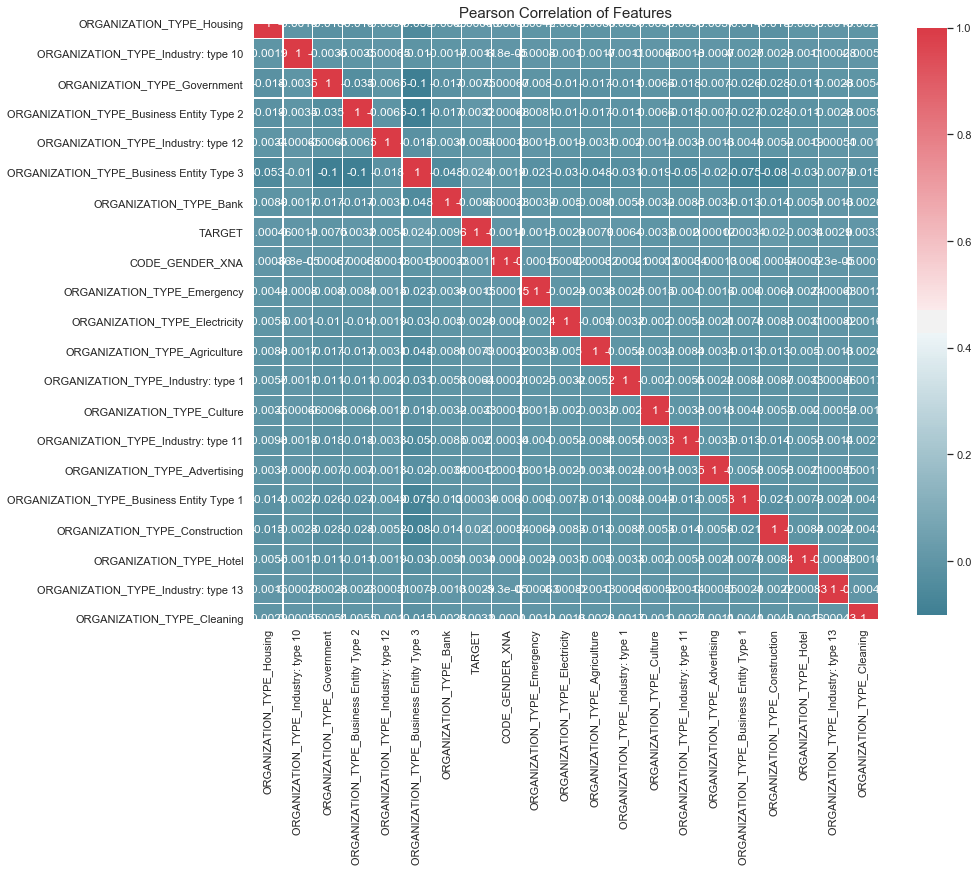

In [68]:
correlation_heatmap(train_df_v7)

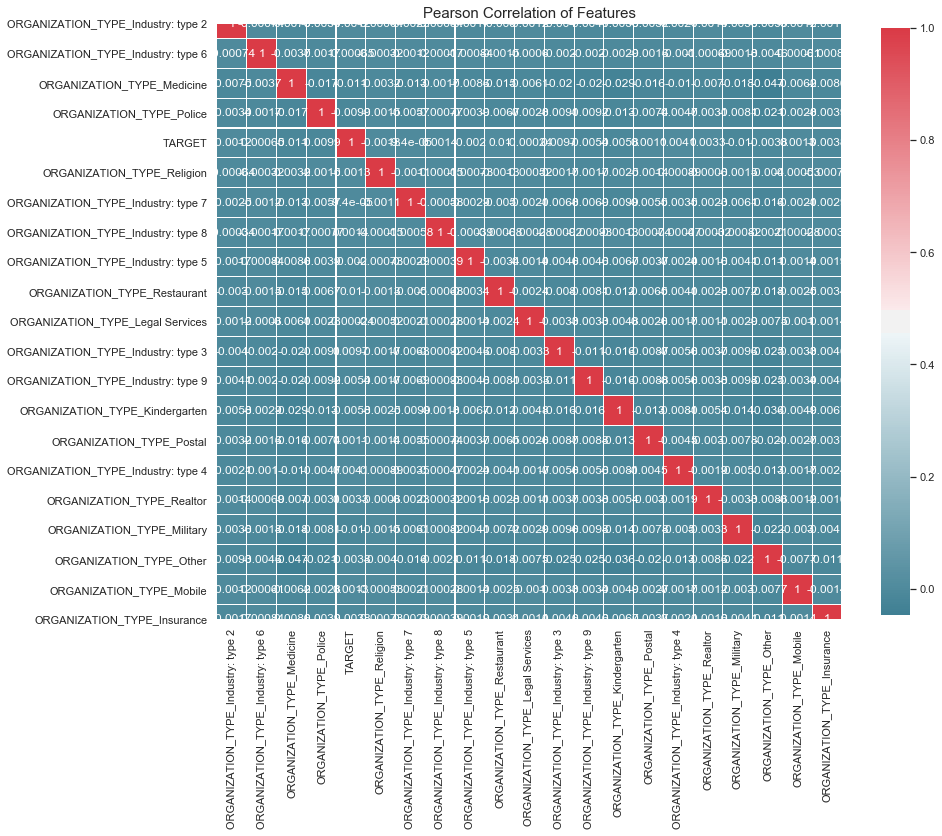

In [69]:
correlation_heatmap(train_df_v8)

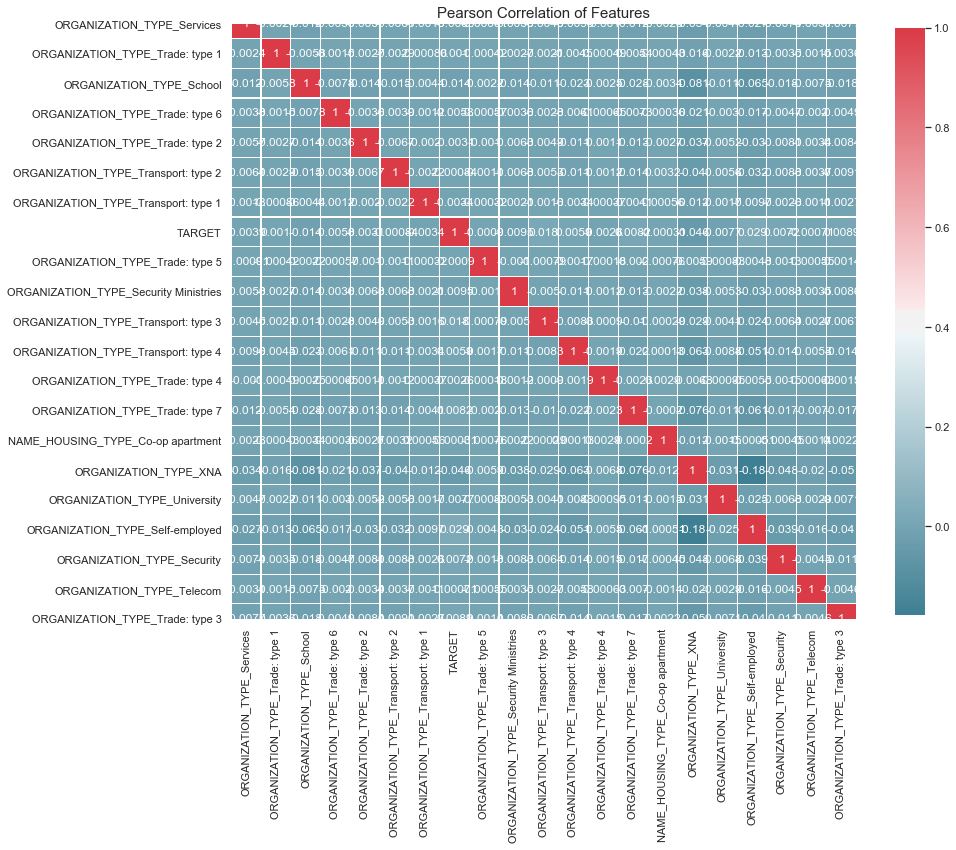

In [70]:
correlation_heatmap(train_df_v9)

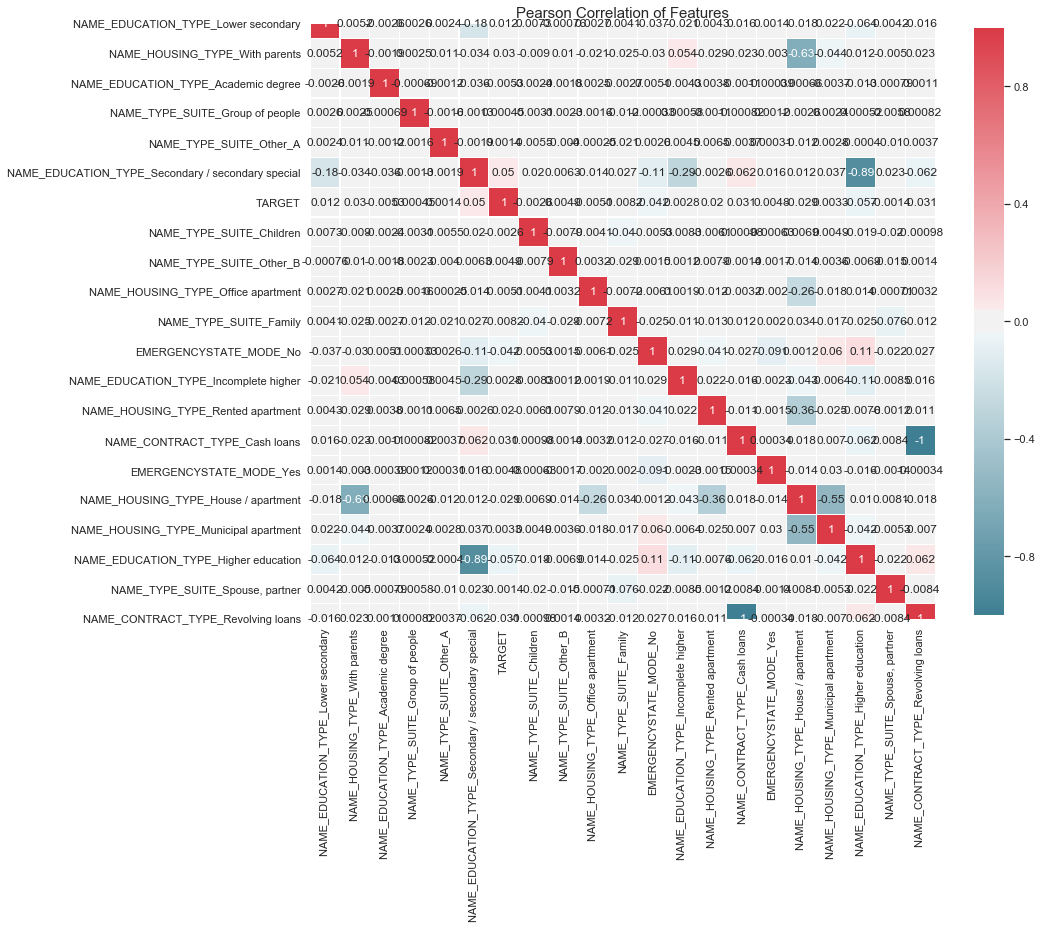

In [71]:
correlation_heatmap(train_df_v10)

NAME_EDUCATION_TYPE_Secondary / secondary special are higher than 0.05 correlation. So 1 vairable are selected as final vairable

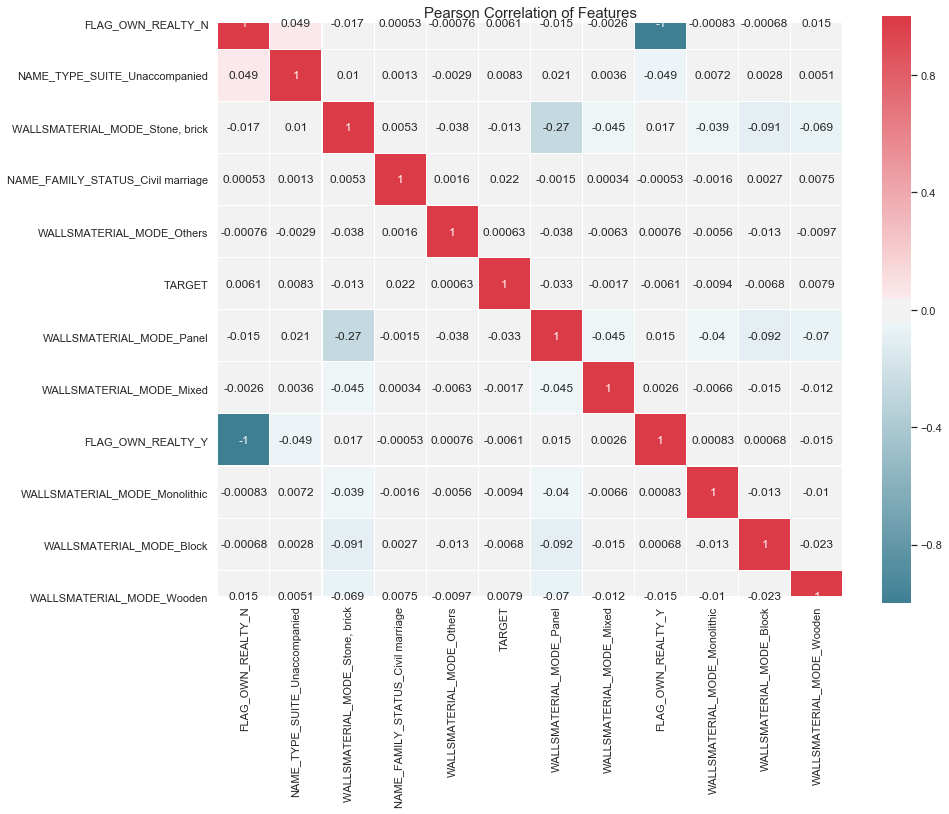

In [72]:
correlation_heatmap(train_df_v11)

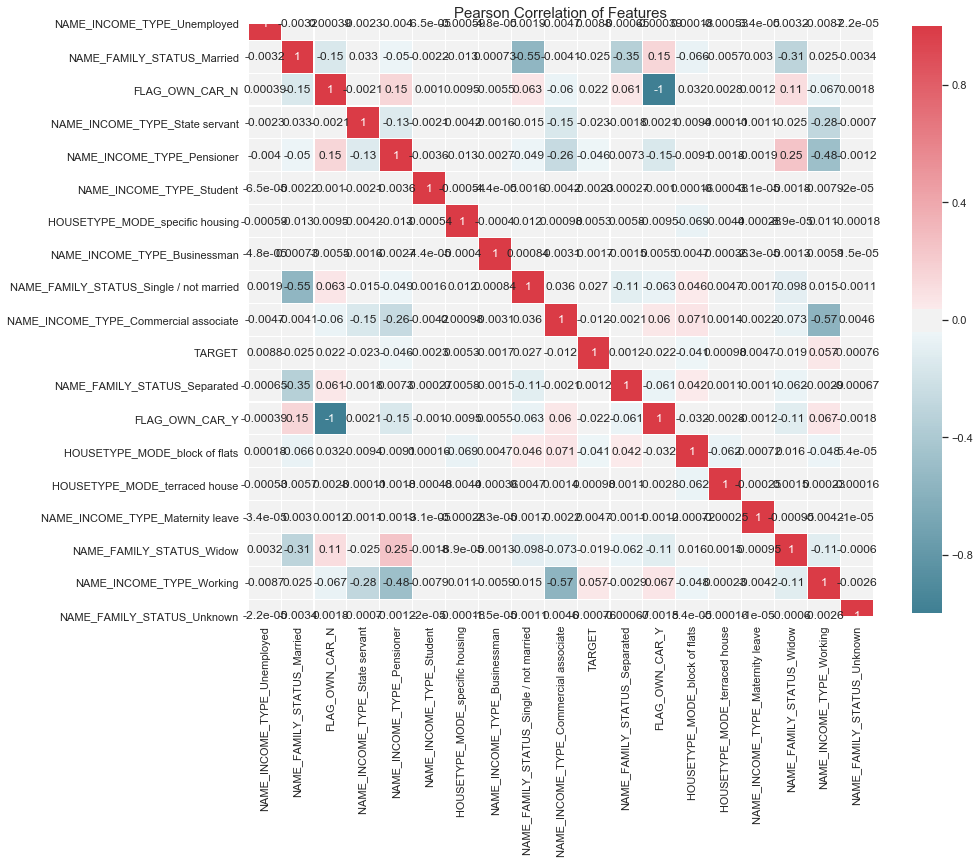

In [73]:
correlation_heatmap(train_df_v12)

NAME_INCOME_TYPE_Working is higher than 0.05 correlation. So 1 vairable are selected as final vairable

Finally  NAME_INCOME_TYPE_Working, NAME_EDUCATION_TYPE_Secondary / secondary special, AGE_CAL, CODE_GENDER_F,CODE_GENDER_M ,DAYS_LAST_PHONE_CHANGE, REGION_RATING_CLIENT_W_CITY, EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_3 are selected final variables

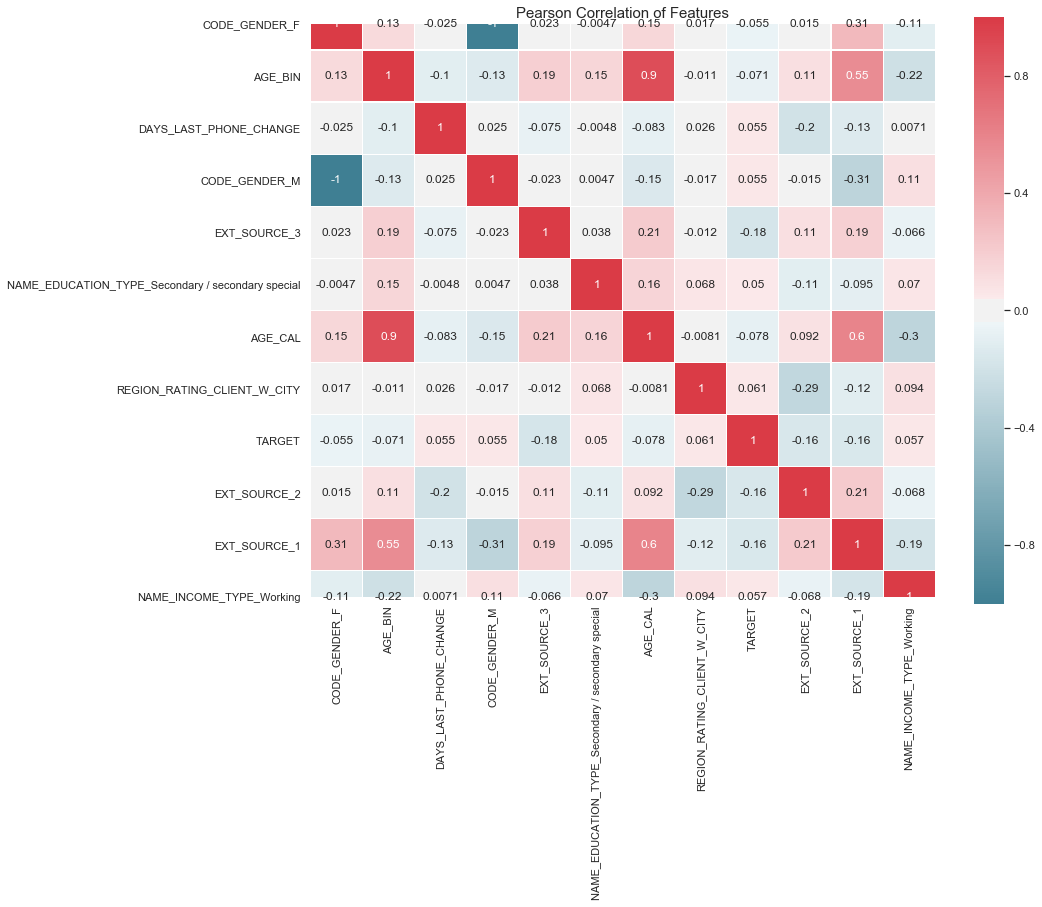

In [74]:
final_list={'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'AGE_CAL', 'AGE_BIN', 'CODE_GENDER_F','CODE_GENDER_M' ,'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3','TARGET'}
train_df_final_list=train_df[final_list]
correlation_heatmap(train_df_final_list)

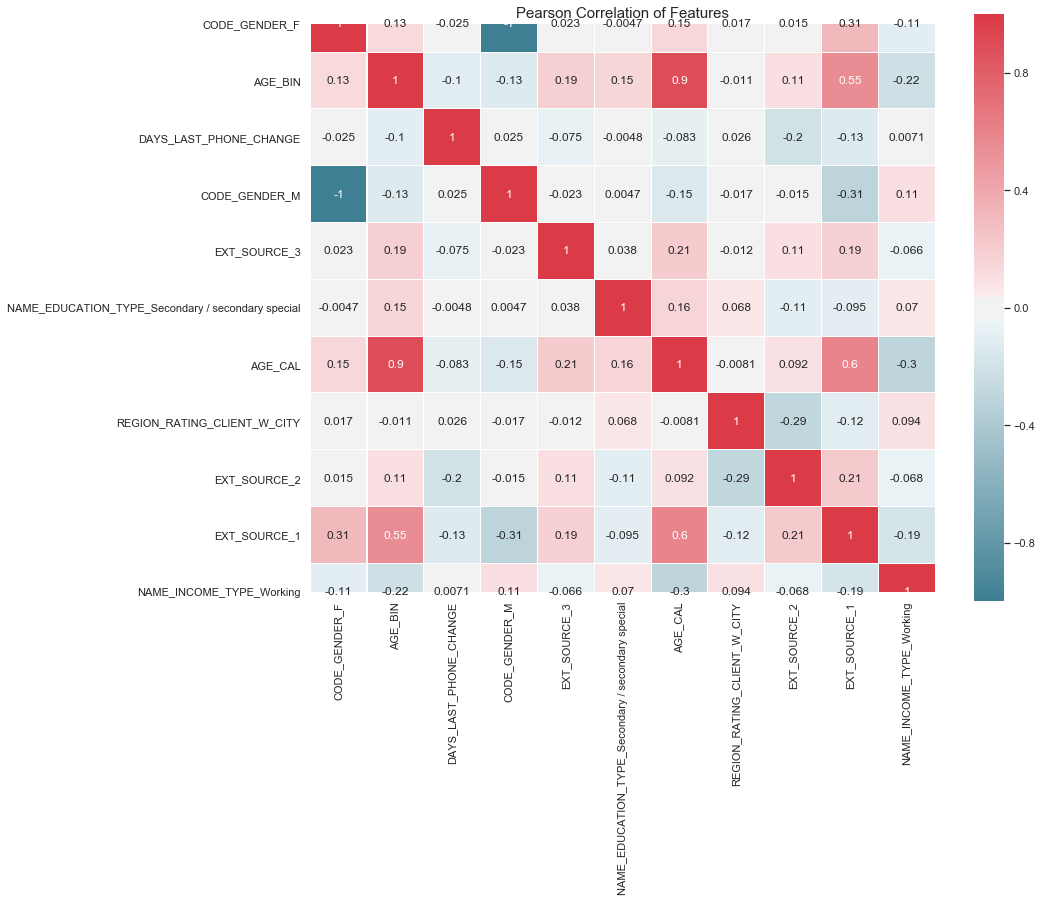

In [75]:
final_list_V1={'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'AGE_CAL', 'AGE_BIN', 'CODE_GENDER_F','CODE_GENDER_M' ,'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3'}
train_df_final_list_V1=train_df[final_list_V1]
correlation_heatmap(train_df_final_list_V1)

### 6.1.1 Elimination List 
1. EXT_SOURCE_1 variable is elimanted because of high correlated age_cal. I can choose the age_cal
1. EXT_SOURCE_3 variable is elimanted because of high correlated age_cal. I can choose the age_cal
2. Age_bin variable is elimanted because of high correlated age_cal. I can choose the age_cal
3. Gender_M variable is elimanted because of high correlated Gender_F. I can choose the Gender_F
4. REGION_RATING_CLIENT_W_CITY is elimanted because of moderate correlated ext_source_2. I can choose the ext_source_2 
5. NAME_INCOME_TYPE_Working is elimanted because of moderate correlated age_cal. I can choose the age_cal


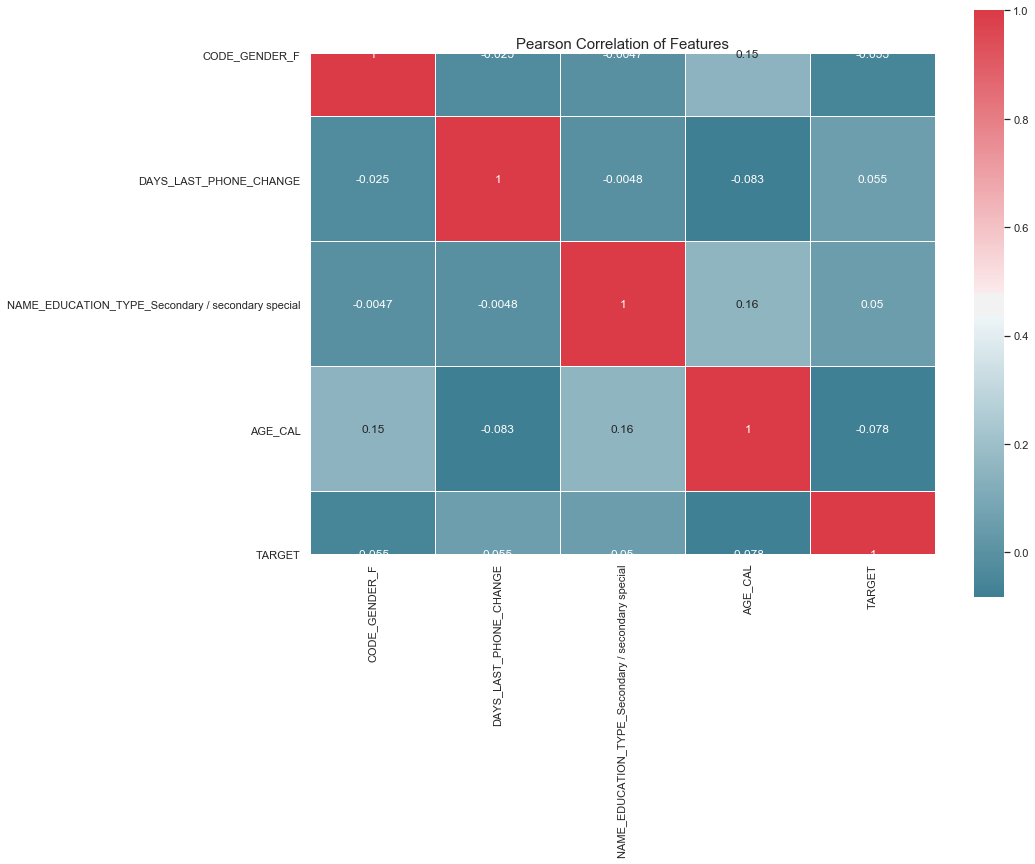

In [76]:
final_list_V2_with_target={ 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'AGE_CAL', 'CODE_GENDER_F' ,'DAYS_LAST_PHONE_CHANGE','TARGET'}

final_list_V2={ 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'AGE_CAL', 'CODE_GENDER_F' ,'DAYS_LAST_PHONE_CHANGE'}
test_final_list_V2={ 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'AGE_CAL', 'CODE_GENDER_F' ,'DAYS_LAST_PHONE_CHANGE'}

train_df_final_list_V2=train_df[final_list_V2]
test_df_final_list_V2=test_df[test_final_list_V2]

train_df_final_list_V2_with_target=train_df[final_list_V2_with_target]

correlation_heatmap(train_df_final_list_V2_with_target)

In [77]:
train_df_final_list_V2.describe()

CODE_GENDER_F  NAME_EDUCATION_TYPE_Secondary / secondary special        AGE_CAL  DAYS_LAST_PHONE_CHANGE
count  307508.000000                                      307508.000000  307508.000000           307508.000000
mean        0.658344                                           0.710193      43.937135             -962.854518
std         0.474266                                           0.453673      11.956076              826.806465
min         0.000000                                           0.000000      20.517808            -4292.000000
25%         0.000000                                           0.000000      34.008219            -1570.000000
50%         1.000000                                           1.000000      43.150685             -757.000000
75%         1.000000                                           1.000000      53.923288             -274.000000
max         1.000000                                           1.000000      69.120548                0.000000

## 6.2 Train Test Cross Validation Split

the data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.
In order to avoid this, we can perform something called cross validation. It’s very similar to train/test split, but it’s applied to more subsets. I decided to split size in below side 

* Train dataset %60
* Test dataset %20
* Cross Validation dataset %20

References: https://tarangshah.com/blog/2017-12-03/train-validation-and-test-sets/

In [78]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [79]:
X=train_df_final_list_V2
y = train_df['TARGET']


#Train Test Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

 <a id='hy8'></a>

# 7. Modelling
## 7.1 Modelling selection
In literature logistic regression have been used usually for credit risk modeling. So I selected logistic regression modelling approach. If accuracy and precision is lower than expectation, we will try more machine learning methodolgy.

References: https://smartdrill.com/pdf/Credit%20Risk%20Analysis.pdf

## 7.2 Modelling Metric
In literature modelling result is done comparing auc roc score and precision. We have focused auc roc score and precision. 
It is one of the most important evaluation metrics for checking any classification model’s performance.
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

In a classification task, the precision for a class is the number of true positives (i.e. the number of items correctly labeled as belonging to the positive class) divided by the total number of elements labeled as belonging to the positive class (i.e. the sum of true positives and false positives, which are items incorrectly labeled as belonging to the class). Recall in this context is defined as the number of true positives divided by the total number of elements that actually belong to the positive class (i.e. the sum of true positives and false negatives, which are items which were not labeled as belonging to the positive class but should have been).

In information retrieval, a perfect precision score of 1.0 means that every result retrieved by a search was relevant (but says nothing about whether all relevant documents were retrieved) whereas a perfect recall score of 1.0 means that all relevant documents were retrieved by the search (but says nothing about how many irrelevant documents were also retrieved).

It is also important for us that what percentage of estimated defaults are true defaults.
References:https://en.wikipedia.org/wiki/Precision_and_recall#F-measure
References:https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

## 7.3 Model Implementaion


C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train/Test split results:
LogisticRegression accuracy is 0.920
LogisticRegression log_loss is 0.271
LogisticRegression auc is 0.626


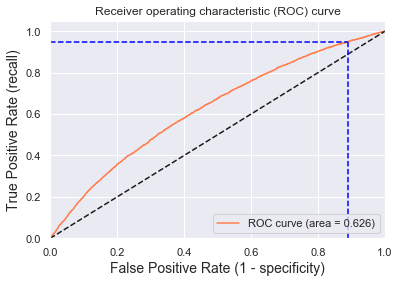

C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56590
           1       0.00      0.00      0.00      4912

    accuracy                           0.92     61502
   macro avg       0.46      0.50      0.48     61502
weighted avg       0.85      0.92      0.88     61502

Using a threshold of 0.043 guarantees a sensitivity of 0.950 and a specificity of 0.109, i.e. a false positive rate of 89.05%.


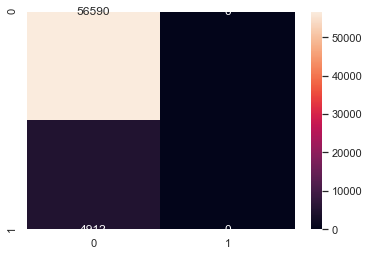

In [80]:
#Model Alternative 1

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=20)
#old


# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))



idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print(classification_report(y_test, y_pred))

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train/Test split results:
LogisticRegression accuracy is 0.919
LogisticRegression log_loss is 0.274
LogisticRegression auc is 0.621


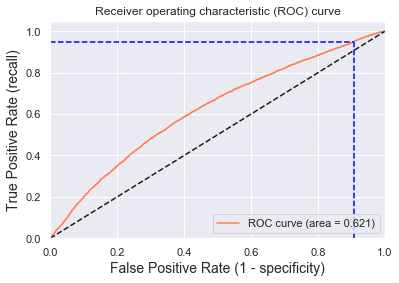

C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56590
           1       0.00      0.00      0.00      4912

    accuracy                           0.92     61502
   macro avg       0.46      0.50      0.48     61502
weighted avg       0.85      0.92      0.88     61502

Using a threshold of 0.042 guarantees a sensitivity of 0.950 and a specificity of 0.092, i.e. a false positive rate of 90.76%.


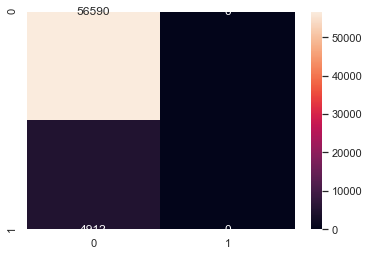

In [81]:
#Model Alternative 1
#Cross Validation
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
y_pred_proba = logreg.predict_proba(X_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_val, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_val, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))



idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print(classification_report(y_test, y_pred))

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

Our model have not been predicted default customers. So we will need to apply new machine learning aproach and data set aproach 

## 7.4 Data Sampling

In [82]:
train_df['TARGET'].value_counts()

0    282683
1     24825
Name: TARGET, dtype: int64

We are doing sampling 50:50. Our dataset 24825 default customer and 24825 non-default customer. So we will train the alternative model for this dataset
References:https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [83]:
default = train_df_final_list_V2_with_target[train_df_final_list_V2_with_target['TARGET']==1]
#nondefault = train_df_final_list_V2[train_df_final_list_V2.TARGET=="0"]
nondefault = train_df_final_list_V2_with_target[train_df_final_list_V2_with_target['TARGET']==0]

train_df['TARGET'].value_counts()

# We randomly select 492 nondefault
nondefault_sub = nondefault.sample(24825, random_state=25)

# dataset_sub is the dataset composed of 24825 nondefault and of 492 default
dataset_sub = default.append(nondefault_sub, ignore_index=True)


print('This sub dataset contains ',dataset_sub.shape[0],'rows')
print('This sub dataset contains ',dataset_sub.shape[1],'columns')
dataset_sub_wio_Target=dataset_sub.drop(['TARGET'], axis=1)

This sub dataset contains  49650 rows
This sub dataset contains  5 columns


In [102]:
X=dataset_sub_wio_Target
y=dataset_sub['TARGET']
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)

# Proportion of default in train set and test set
print('Proportion of default in train:',y_train[y_train == True].shape[0]/X_train.shape[0])
print('Proportion of default in test:',y_test[y_test == True].shape[0]/X_test.shape[0])
print('Proportion of default in valditaion:',y_val[y_val == True].shape[0]/X_val.shape[0])

Proportion of default in train: 0.4989929506545821
Proportion of default in test: 0.5003021148036254
Proportion of default in valditaion: 0.5027190332326285


In [85]:
from sklearn.metrics import recall_score, precision_recall_curve, average_precision_score, confusion_matrix, precision_score
scoring = 'average_precision'

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#import xgboost

models = []
models.append(('LR',LogisticRegression(random_state=seed)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('QDA',QuadraticDiscriminantAnalysis()))
#models.append(('SVM',SVC(random_state=seed,gamma='scale')))

ensembles = []
ensembles.append(('RF', RandomForestClassifier(random_state=seed,n_estimators=100)))
ensembles.append(('ADA', AdaBoostClassifier(random_state=seed)))
ensembles.append(('GBM', GradientBoostingClassifier(random_state=seed)))
#ensembles.append(('XGB', XGBClassifier(random_state=seed)))

In [87]:
# Models evaluation function
def get_score_models(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # All our models implement the 'decision_function' method
    # It is not the case of all our ensembles
    y_score = model.decision_function(X_test)
    print(classification_report(y_test, y_pred))

    compare(y_test,y_pred,y_score)
    
# Ensembles evaluation function
def get_score_ensembles(ensemble,X_train,X_test,y_train,y_test):
    ensemble.fit(X_train,y_train)
    y_pred = ensemble.predict(X_test)
    
    # All our ensembles implement the 'predict_proba' method
    # It is not the case of all our models
    y_score = ensemble.predict_proba(X_test)[:,1]
    print(classification_report(y_test, y_pred))

    compare(y_test,y_pred,y_score)

# Print metrics and graph function
def compare(y_test,y_pred,y_score):
    print('Confusion matrix:')
    print(confusion_matrix(y_test,y_pred))
    
    print('Recall:',recall_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Area under the curve:',average_precision_score(y_test,y_score))
    
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.step(recall, precision, alpha=0.4, color='b', where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', step='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0, 1.05])
    plt.xlim([0, 1])
    plt.title('Precision-Recall curve')
    plt.show()

---------- LR ----------


C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.60      0.59      0.59      4962
           1       0.60      0.60      0.60      4968

    accuracy                           0.60      9930
   macro avg       0.60      0.60      0.60      9930
weighted avg       0.60      0.60      0.60      9930

Confusion matrix:
[[2930 2032]
 [1966 3002]]
Recall: 0.6042673107890499
Precision: 0.5963448549860946
Area under the curve: 0.605769004204006


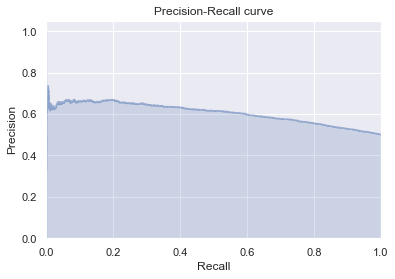

---------- LDA ----------
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      4962
           1       0.60      0.60      0.60      4968

    accuracy                           0.60      9930
   macro avg       0.60      0.60      0.60      9930
weighted avg       0.60      0.60      0.60      9930

Confusion matrix:
[[2932 2030]
 [1964 3004]]
Recall: 0.604669887278583
Precision: 0.5967421533571713
Area under the curve: 0.6057146367844228


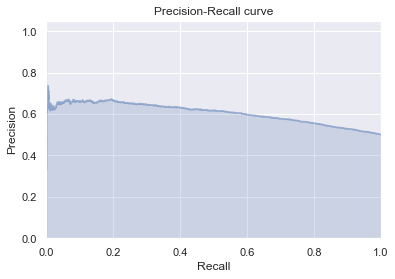

---------- QDA ----------
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      4962
           1       0.60      0.59      0.60      4968

    accuracy                           0.60      9930
   macro avg       0.60      0.60      0.60      9930
weighted avg       0.60      0.60      0.60      9930

Confusion matrix:
[[3055 1907]
 [2054 2914]]
Recall: 0.5865539452495975
Precision: 0.6044389130885708
Area under the curve: 0.6088810563323734


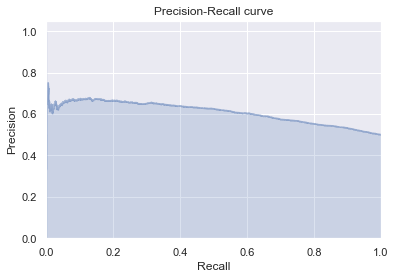

In [88]:
# Evaluation of each model
for name,model in models:
    print('----------',name,'----------')
    get_score_models(model,X_train,X_test,y_train,y_test)


---------- RF ----------
              precision    recall  f1-score   support

           0       0.54      0.55      0.55      4962
           1       0.55      0.54      0.54      4968

    accuracy                           0.55      9930
   macro avg       0.55      0.55      0.55      9930
weighted avg       0.55      0.55      0.55      9930

Confusion matrix:
[[2744 2218]
 [2291 2677]]
Recall: 0.5388486312399355
Precision: 0.5468845760980593
Area under the curve: 0.5510937539193785


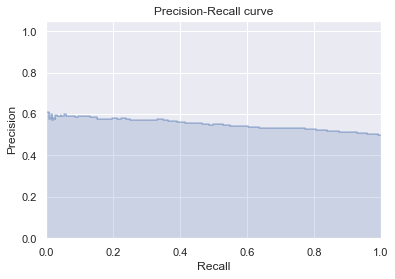

---------- ADA ----------
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      4962
           1       0.60      0.61      0.60      4968

    accuracy                           0.60      9930
   macro avg       0.60      0.60      0.60      9930
weighted avg       0.60      0.60      0.60      9930

Confusion matrix:
[[2922 2040]
 [1943 3025]]
Recall: 0.6088969404186796
Precision: 0.5972359328726555
Area under the curve: 0.6059884916350295


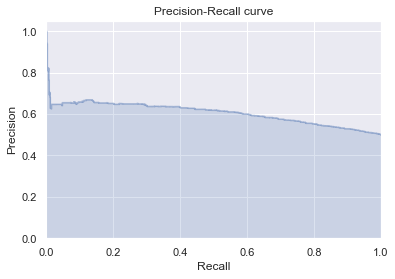

---------- GBM ----------
              precision    recall  f1-score   support

           0       0.60      0.63      0.61      4962
           1       0.61      0.57      0.59      4968

    accuracy                           0.60      9930
   macro avg       0.60      0.60      0.60      9930
weighted avg       0.60      0.60      0.60      9930

Confusion matrix:
[[3143 1819]
 [2121 2847]]
Recall: 0.5730676328502415
Precision: 0.6101585940848693
Area under the curve: 0.6126582000004348


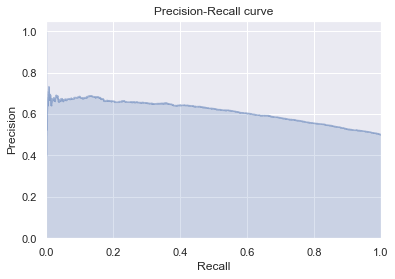

In [89]:
# Evaluation of each ensemble method
for name,ensemble in ensembles:
    print('----------',name,'----------')
    get_score_ensembles(ensemble,X_train,X_test,y_train,y_test)

QuadraticDiscriminantAnalysis is best score Precision and Area under the curve

* Precision: 0.6044389130885708
* Area under the curve: 0.6088810563323734

GradientBoostingClassifier is best score Precision and Area under the curve

* Precision: 0.6101585940848693
* Area under the curve: 0.6126581898558849

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
kfold = KFold(n_splits=num_folds,random_state=seed)

names = []
results_precision = []
results_aupcr = []
models_score = {}
ensembles_score = {}

# Function cross validating and printing Precision and AUPRC results
def cross_validation(name,classifier,classifiers_score,results_precision,results_aupcr):
    cv_results_precision = cross_val_score(model,X_train,y_train,cv=kfold,scoring='precision')
    cv_results_auprc = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)

    models_score[name] = [cv_results_precision.mean()]
    models_score[name].append(cv_results_precision.std())
    models_score[name].append(cv_results_auprc.mean())
    models_score[name].append(cv_results_auprc.std())
    
    results_precision.append(cv_results_precision)
    results_aupcr.append(cv_results_auprc)
    names.append(name)

    print('----------',name,'----------')
    print('Precision:',models_score[name][0],'(',models_score[name][1],')')
    print('AUPRC:',models_score[name][2],'(',models_score[name][3],')\n')

### 7.5  Model Refinement
QuadraticDiscriminantAnalysis is best model for results_precision and results_auc in kfold validation data. So the best model QuadraticDiscriminantAnalysis for this sampling dataset     

### 7.5.1 K-Fold cross validation

Now, we evaluate the performance of our classifiers with a 10-Fold cross validation.

In [91]:
# 10-Fold cross validation on our models
for name,model in models:
    cross_validation(name,model,models_score,results_precision,results_aupcr)

C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\UTKU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

---------- LR ----------
Precision: 0.5918507006210841 ( 0.013987853273170111 )
AUPRC: 0.6055795488484287 ( 0.018827564523829225 )

---------- LDA ----------
Precision: 0.591640212387562 ( 0.014176580823096252 )
AUPRC: 0.6054602661848324 ( 0.018741638462571902 )

---------- QDA ----------
Precision: 0.5978044846095812 ( 0.015321081844289878 )
AUPRC: 0.6074688613736349 ( 0.018972482359184556 )



In [92]:
# 10-Fold cross validation on ensembles
for name,ensemble in ensembles:
    cross_validation(name,ensemble,ensembles_score,results_precision,results_aupcr)

---------- RF ----------
Precision: 0.5978044846095812 ( 0.015321081844289878 )
AUPRC: 0.6074688613736349 ( 0.018972482359184556 )

---------- ADA ----------
Precision: 0.5978044846095812 ( 0.015321081844289878 )
AUPRC: 0.6074688613736349 ( 0.018972482359184556 )

---------- GBM ----------
Precision: 0.5978044846095812 ( 0.015321081844289878 )
AUPRC: 0.6074688613736349 ( 0.018972482359184556 )



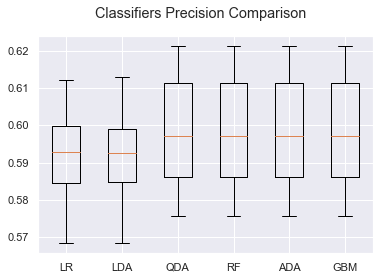

In [93]:
# Compare Classifiers regarding Precision
fig = plt.figure()
fig.suptitle('Classifiers Precision Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_precision)
ax.set_xticklabels(names)
plt.show()

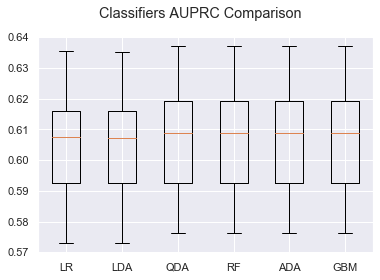

In [94]:
# Compare Classifiers regarding the Precision
fig = plt.figure()
fig.suptitle('Classifiers AUPRC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_aupcr)
ax.set_xticklabels(names)
plt.show()

QuadraticDiscriminantAnalysis is best model for results_precision and results_auc

### 7.6  Model Result
We selected QuadraticDiscriminantAnalysis is best score Precision and Area under the curve

Precision: 0.6044389130885708
Area under the curve: 0.6088810563323734

Model varaibles are
* AGE_CAL
* CODE_GENDER_F
* DAYS_LAST_PHONE_CHANGE
* NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Secondary / secondary special



 <a id='hy9'></a>

## 8 Conclusion

My expectation would be credit type,credit amount or income type for final variable modelling. But these variable were eliminated correlation step. I am surprised for this happen. This proeject aimed to end to end data processing and data modelling in credit risk data. I enjoyed to analyze and create this project

 <a id='hy10'></a>

## 9 References

* [Udacity Data Scientist Nanodegree Program](https://www.udacity.com/course/data-scientist-nanodegree--nd025)
* [Kaggle's Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk)
* [Source Data Dictionary](https://www.kaggle.com/c/home-credit-default-risk/data)
* [Creating New Column](https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition)
* [Correlation Elimination](https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4)
* [Train Test Cross Validation](https://tarangshah.com/blog/2017-12-03/train-validation-and-test-sets/)
* [Credit Risk Modelling](https://smartdrill.com/pdf/Credit%20Risk%20Analysis.pdf)
* [Lgistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
* [Gradient Boosting](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
* [LightGBM’s documentation](https://lightgbm.readthedocs.io/en/latest/)
* [Pandas Data Frame Describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
* [Pandas Missing Data](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#missing-data-handling)
* [tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)
* [Precision_and_recall#F-measure](https://en.wikipedia.org/wiki/Precision_and_recall#F-measure) 
* [understanding-auc-roc-curveReferences](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)